In [5]:
!pip install pandas 



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


        Imports

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import joblib


      Load Dataset

In [57]:
DATA_PATH = r"D:\\codes\\brain tumor project yz\\infosys\\FINAL_LABELED_DATASET_MODULE3.csv"

# Robust CSV loading
df = pd.read_csv(DATA_PATH, encoding="latin1")

print("✅ Dataset loaded:", df.shape)
print(df.columns.tolist())


✅ Dataset loaded: (22264, 34)
['country', 'city', 'latitude', 'longitude', 'co aqi value', 'co aqi category', 'ozone aqi value', 'ozone aqi category', 'no2 aqi value', 'no2 aqi category', 'pm2.5 aqi value', 'pm2.5 aqi category', 'aqi value', 'aqi category', 'temperature (°c)', 'humidity (%)', 'wind speed (m/s)', 'wind direction (Ã¢Â°)', 'weather description', 'road_count', 'industrial_count', 'farmland_count', 'dump_site_count', 'recycling_count', 'green_area_count', 'near_road_2km', 'near_industry_2km', 'near_dump_2km', 'dist_city_km', 'dist_road_km', 'dist_industry_km', 'dist_dump_km', 'pollution_source', 'timestamp']


In [58]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("°", "")
)

print("✅ Cleaned columns:")
print(df.columns.tolist())


✅ Cleaned columns:
['country', 'city', 'latitude', 'longitude', 'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value', 'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category', 'pm2.5_aqi_value', 'pm2.5_aqi_category', 'aqi_value', 'aqi_category', 'temperature_c', 'humidity_%', 'wind_speed_m/s', 'wind_direction_ã¢â', 'weather_description', 'road_count', 'industrial_count', 'farmland_count', 'dump_site_count', 'recycling_count', 'green_area_count', 'near_road_2km', 'near_industry_2km', 'near_dump_2km', 'dist_city_km', 'dist_road_km', 'dist_industry_km', 'dist_dump_km', 'pollution_source', 'timestamp']


In [59]:
df.rename(columns={
    "temperature_°c": "temperature_c",
    "humidity_%": "humidity_pct",
    "wind_speed_m/s": "wind_speed_ms",
    "wind_direction_ã¢â": "wind_direction_deg"
}, inplace=True, errors="ignore")


In [60]:


TARGET = "pollution_source"

FEATURES = [
    "temperature_c",
    "dist_industry_km",
    "dist_road_km",
    "dist_dump_km"
]

# Keep only existing columns (avoids KeyError)
FEATURES = [f for f in FEATURES if f in df.columns]

print("✅ Using features:", FEATURES)


✅ Using features: ['temperature_c', 'dist_industry_km', 'dist_road_km', 'dist_dump_km']


In [61]:
df = df.dropna(subset=FEATURES + [TARGET])

print("✅ Clean dataset shape:", df.shape)


✅ Clean dataset shape: (22264, 34)


In [62]:
df[TARGET] = df[TARGET].astype("category").cat.codes

label_map = dict(enumerate(df[TARGET].astype("category").cat.categories))
print("✅ Label mapping:", label_map)


✅ Label mapping: {0: 0, 1: 1, 2: 2}


In [63]:
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (17811, 4)
Test size: (4453, 4)


In [64]:
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    min_samples_leaf=40,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42
)


rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📊 Random Forest Report")
print(classification_report(y_test, y_pred_rf))



📊 Random Forest Report
              precision    recall  f1-score   support

           0       0.35      0.62      0.45       693
           1       0.69      0.63      0.66      2626
           2       0.36      0.26      0.30      1134

    accuracy                           0.54      4453
   macro avg       0.47      0.50      0.47      4453
weighted avg       0.55      0.54      0.54      4453



In [65]:
dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=15,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n📊 Decision Tree Report")
print(classification_report(y_test, y_pred_dt))



📊 Decision Tree Report
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       693
           1       0.64      0.92      0.75      2626
           2       0.46      0.09      0.15      1134

    accuracy                           0.61      4453
   macro avg       0.53      0.44      0.43      4453
weighted avg       0.57      0.61      0.54      4453



In [66]:
xgb = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.08,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=2.0,
    eval_metric="mlogloss",
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n📊 XGBoost Report")
print(classification_report(y_test, y_pred_xgb))



📊 XGBoost Report
              precision    recall  f1-score   support

           0       0.50      0.35      0.41       693
           1       0.64      0.91      0.75      2626
           2       0.43      0.09      0.15      1134

    accuracy                           0.62      4453
   macro avg       0.52      0.45      0.44      4453
weighted avg       0.57      0.62      0.55      4453



In [69]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


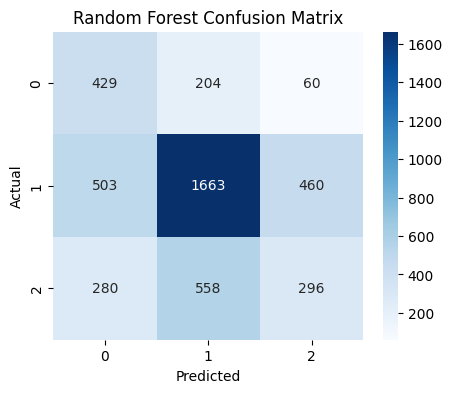

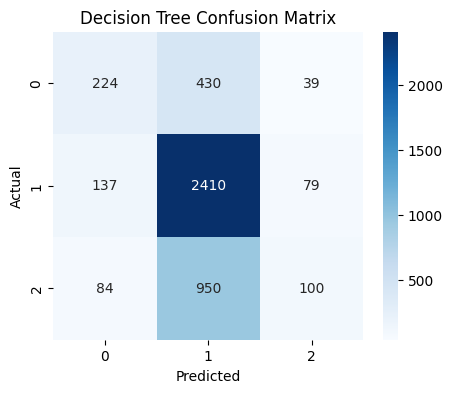

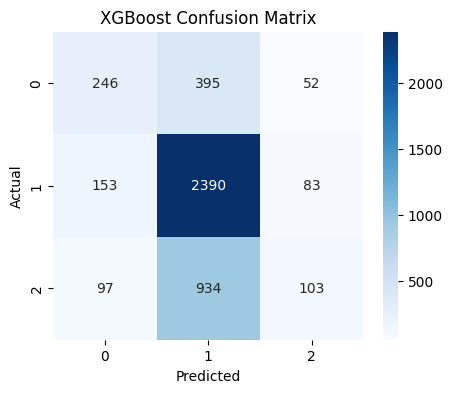

In [71]:
plot_cm(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_cm(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_cm(y_test, y_pred_xgb, "XGBoost Confusion Matrix")


In [73]:
joblib.dump(rf, "random_forest_pollution.pkl")
joblib.dump(dt, "decision_tree_pollution.pkl")
joblib.dump(xgb, "xgboost_pollution.pkl")

print("✅ Models saved successfully")


✅ Models saved successfully
